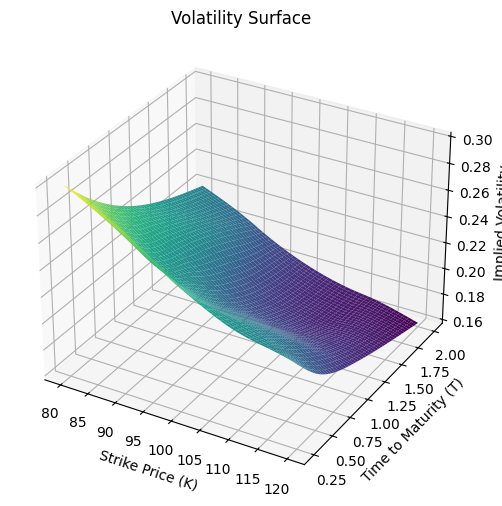

In [1]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 模拟市场数据：行权价（K）、到期时间（T）、隐含波动率（IV）
K_values = np.array([80, 90, 100, 110, 120])      # 行权价
T_values = np.array([0.25, 0.5, 1.0, 2.0])        # 到期时间（年）
IV_grid = np.array([
    [0.30, 0.28, 0.25, 0.22],   # K=80的波动率
    [0.28, 0.25, 0.23, 0.20],   # K=90
    [0.25, 0.23, 0.20, 0.18],   # K=100（平值）
    [0.23, 0.22, 0.19, 0.17],   # K=110
    [0.22, 0.20, 0.18, 0.16],   # K=120
])

# 生成网格点
K_mesh, T_mesh = np.meshgrid(K_values, T_values, indexing='ij')
points = np.column_stack((K_mesh.ravel(), T_mesh.ravel()))
values = IV_grid.ravel()

# 定义插值网格（更密集）
K_interp = np.linspace(80, 120, 50)
T_interp = np.linspace(0.25, 2.0, 50)
K_interp_mesh, T_interp_mesh = np.meshgrid(K_interp, T_interp, indexing='ij')

# 使用线性插值
IV_interp = griddata(points, values, (K_interp_mesh, T_interp_mesh), method='cubic')

# 绘制波动率曲面
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_interp_mesh, T_interp_mesh, IV_interp, cmap='viridis')
ax.set_xlabel('Strike Price (K)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Implied Volatility')
plt.title('Volatility Surface')
plt.show()